In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

TODO:
- [ ] convert nutrition entry to a list of numbers. remove text since order of nutritional labels are standardized
- [ ] 

In [25]:
se_df = pd.read_pickle('../data/serious_eats_data.pkl')
display(se_df.head(5))
se_df.shape

,url,recipe_name,nutrition,category,cuisine,ingredient,instruction
0,https://www.seriouseats.com/strawberry-lemonad...,Strawberry Lemonade,NaN,[Beverage],[American],"[For the Strawberry Lemonade Concentrate:, 3/4...",[For the Strawberry Lemonade Concentrate: In a...
1,https://www.seriouseats.com/red-wine-braised-b...,Red Wine-Braised Beef Shanks,"{'@type': 'NutritionInformation', 'calories': ...","[Dinner, Entree, Mains]",[American],[6 beef hindquarter shanks (about 1 1/2 inches...,[Preheat oven to 300°F (150°C). Season shanks ...
2,https://www.seriouseats.com/taiwanese-meat-sau...,Lu Rou Fan (Taiwanese Meat Sauce with Rice),"{'@type': 'NutritionInformation', 'calories': ...","[Lunch, Dinner, Condiments and Sauces, Mains]",[Asian],"[2 cups vegetable or canola oil, 1 1/2 cups th...",[Line a large plate with a triple layer of pap...
3,https://www.seriouseats.com/chacarero-chileno-...,Chacarero Chileno (Chilean Steak and Bean Sand...,"{'@type': 'NutritionInformation', 'calories': ...","[Entree, Lunch, Dinner, Mains, Quick Dinners, ...","[Latin American, Latin]","[Kosher salt, 1/2 pound (225g) green beans, cu...",[Bring a large pot of salted water to a rollin...
4,https://www.seriouseats.com/blue-cheese-dip-sa...,Blue Cheese Dip,"{'@type': 'NutritionInformation', 'calories': ...","[Snack, Appetizer, Condiments and Sauces, Cond...",[American],"[1/4 pound blue cheese, 1/2 cup mayonnaise, 1/...","[In a medium bowl, mash blue cheese with a for..."


(6739, 7)

Recipes that have missing values in `instruction` can be decisively dropped. Are there other imputation methods on missing values before we resort to dropping that entry entirely?

In [26]:
nan_count = se_df.isna().sum()
nan_count

url               0
recipe_name       0
nutrition      1780
category         13
cuisine         905
ingredient        0
instruction       1
dtype: int64

There seems to be 10 duplicated recipes. We can drop those.

In [11]:
se_df.describe()

,url,recipe_name,nutrition,category,cuisine,ingredient,instruction
count,6739,6739,4959,6726,5834,6739,6738
unique,6739,6729,4955,2198,203,6729,6721
top,https://www.seriouseats.com/strawberry-lemonad...,Gyudon (Japanese Simmered Beef and Rice Bowls)...,"{'@type': 'NutritionInformation', 'calories': ...","[Entree, Mains]",[American],"[For the Crêpes:, 6 large eggs (12 ounces; 330...",[Combine both beers in a Collins or highball g...
freq,1,2,2,252,2303,2,4


In [12]:
se_df[se_df.duplicated('recipe_name')]

,url,recipe_name,nutrition,category,cuisine,ingredient,instruction
5019,https://www.seriouseats.com/bake-the-book-crep...,Crêpe Cake (Gâteau de Crêpes),NaN,[Dessert],[French],"[For the Crêpes:, 6 large eggs (12 ounces; 330...","[For the Crêpe Batter : Place eggs, milk, flou..."
5032,https://www.seriouseats.com/jamie-olivers-pizz...,"Jamie Oliver&#39;s Pizza Fritta, &#39;Fried Pi...",NaN,[Pizza],NaN,"[1 basic pizza dough (recipe follows), Flour, ...","[First, make your basic pizza dough. While it’..."
5472,https://www.seriouseats.com/jamaican-curry-chi...,Jamaican Curry Chicken,NaN,"[Lunch, Dinner, Entree]",[Caribbean],"[For the Marinated Chicken:, 3 1/2 pounds (1.6...",[For the Marinated Chicken: Rub chicken all ov...
8533,https://www.seriouseats.com/simple-vinaigrette,Simple Vinaigrette Recipe,"{'@type': 'NutritionInformation', 'calories': ...","[Condiments and Sauces, Dressings and Vinaigre...",[French],[3 tablespoons white wine vinegar or lemon jui...,[Combine all ingredients in small container or...
8855,https://www.seriouseats.com/stone-fence-cider-...,Stone Fence Recipe,"{'@type': 'NutritionInformation', 'calories': ...","[Rum, Cocktail]",[American],"[2 ounces gold rum, 6 ounces hard cider]",[Fill a rocks glass with ice. Pour the rum ove...
9181,https://www.seriouseats.com/confetti-cookies-r...,Confetti Cookies Recipe,NaN,"[Cookies, Desserts]",NaN,"[3 cups all purpose flour, 1 1/2 teaspoons bak...","[In a medium bowl, whisk together flour, bakin..."
9197,https://www.seriouseats.com/gluten-free-snicke...,Gluten-Free Snickerdoodles Recipe,NaN,"[Cookies, Desserts]",NaN,"[6 ounces (1 1/2 cups) white rice flour, 2 oun...","[In small mixing bowl, whisk together white ri..."
9403,https://www.seriouseats.com/red-onion-jam-recipe,Red Onion Jam Recipe,"{'@type': 'NutritionInformation', 'calories': ...","[Condiments and Sauces, Condiment, Jam / Jelly]",[American],"[2 tablespoons olive oil, 2 pounds red onions,...",[Heat olive oil in a medium skillet over mediu...
10190,https://www.seriouseats.com/gyudon-japanese-si...,Gyudon (Japanese Simmered Beef and Rice Bowls)...,NaN,"[Mains, Quick Dinners]",[Japanese],"[1 small onion, slivered (about 4 ounces; 120g...","[Combine onion, dashi, sake, soy sauce, and su..."
11812,https://www.seriouseats.com/dinner-tonight-bro...,Dinner Tonight: Broiled Ham Steaks Recipe,NaN,"[Entree, Lunch, Dinner, Mains]",[American],"[4 ham steaks, 2 tablespoons ketchup, 4 teaspo...",[Preheat the broiler. Wrap some foil around a ...


In [13]:
se_df = se_df.drop_duplicates(subset=['recipe_name'], ignore_index=True)
se_df.describe()

,url,recipe_name,nutrition,category,cuisine,ingredient,instruction
count,6729,6729,4956,6716,5827,6729,6728
unique,6729,6729,4953,2197,203,6724,6716
top,https://www.seriouseats.com/strawberry-lemonad...,Strawberry Lemonade,"{'@type': 'NutritionInformation', 'calories': ...","[Entree, Mains]",[American],"[1 (2 1/2-pound; 1kg) whole octopus, rinsed we...",[Combine both beers in a Collins or highball g...
freq,1,1,2,252,2300,2,4


Lowest hanging fruits to analyze are recipe `category` and `cuisine`. The other ones will need more clean up. So let me look at these two first. 

# `category` feature

In [14]:
se_df['category'].describe()

count                6716
unique               2197
top       [Entree, Mains]
freq                  252
Name: category, dtype: object

In [15]:
se_df['category'].value_counts()

category
[Entree, Mains]                                               252
[Mains]                                                       165
[Entree, Dinner, Mains]                                       141
[Side Dish, Sides]                                            136
[Entree]                                                      131
                                                             ... 
[Breakfast and Brunch, Yeast Bread, Bread]                      1
[Snack, Breakfast, Brunch, Breakfast and Brunch, Sandwich]      1
[Side Dish, Quick and Easy, Sides, Condiment]                   1
[Syrup, Ingredient]                                             1
[Lunch, Dinner, Appetizer, Mains]                               1
Name: count, Length: 2197, dtype: int64

It's added complexity to read .csv, so I'm saving and reading the scraped data as .pkl instead from now on. I am keeping the .csv for reading with Excel.

In [18]:
for i, l in enumerate(se_df['category'].iloc[:5]):
    print("list",i,"is",type(l))
print(se_df['category'].explode().value_counts())

list 0 is <class 'list'>
list 1 is <class 'list'>
list 2 is <class 'list'>
list 3 is <class 'list'>
list 4 is <class 'list'>
category
Entree                           1738
Mains                            1603
Dessert                           800
Side Dish                         744
Dinner                            733
                                 ... 
Blondies                            4
Syrup                               3
Banana Bread                        3
Ice Cream Sandwiches and Bars       3
Lemonade                            1
Name: count, Length: 114, dtype: int64


In [19]:
unique_categories = se_df['category'].explode().value_counts().index.tolist()
unique_categories_counts = se_df['category'].explode().value_counts().values

Text(0.5, 1.0, 'Total Count by Category')

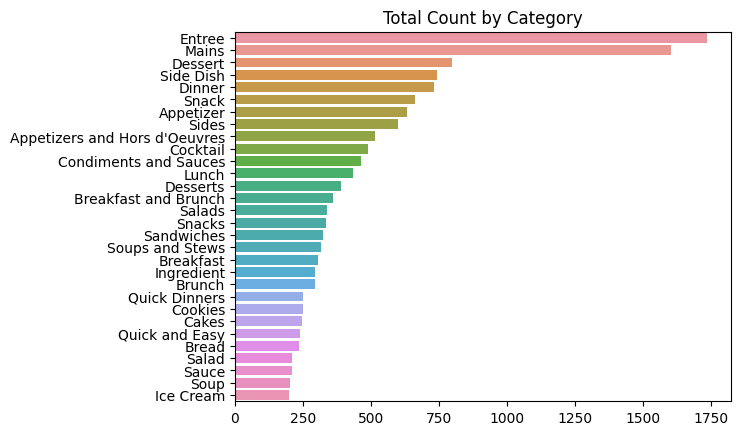

In [20]:
sns.barplot(y=unique_categories[:30], x=unique_categories_counts[:30], orient='h')

plt.title('Total Count by Category')

In [29]:
meal_type = ['Dinner', 'Lunch', 'Breakfast and Brunch', 'Breakfast', 'Brunch', 'Quick Dinners']

# `cuisine` feature

In [45]:
se_df['cuisine'].explode().value_counts()

cuisine
American                  2566
Italian                    583
French                     409
Mexican                    353
Chinese                    282
Asian                      235
Indian                     178
Thai                       173
Japanese                   162
Middle Eastern             139
Copycat                    125
British                    115
Korean                     100
Spanish                     95
Latin                       94
Caribbean                   87
Latin American              86
Southern                    84
Tex-Mex                     72
Vietnamese                  60
Greek                       50
Kosher                      49
African                     39
German                      35
South American              35
Eastern European            29
Moroccan                    24
Cajun                       20
Creole                      19
Moroccan/North African      18
Scandinavian                17
Filipino                    17


In [32]:
unique_cuisine = se_df['cuisine'].explode().value_counts().index.tolist()
unique_cuisine_counts = se_df['cuisine'].explode().value_counts().values

Text(0.5, 1.0, 'Total Count by Cuisine')

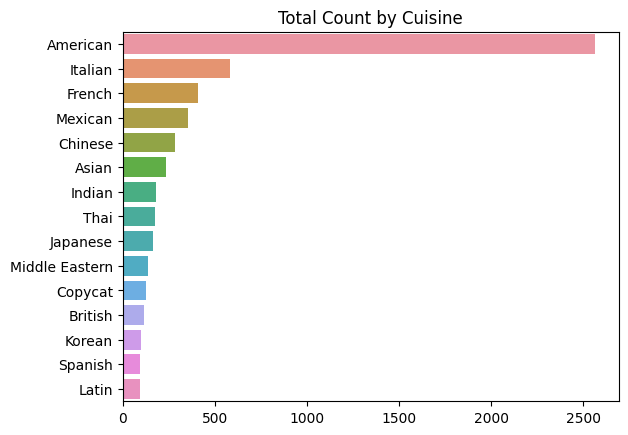

In [36]:
sns.barplot(y=unique_cuisine[:15], x=unique_cuisine_counts[:15], orient='h')

plt.title('Total Count by Cuisine')

I wonder if there is a correlation between the number of steps in a recipe to another variable like category or even cuisine. Let me create another feature named `num_steps`

In [21]:
se_df['num_steps'] = se_df['instruction'].apply(lambda x: int(len(x)) if not np.all(pd.isna(x)) else x)
se_df.head(5)

,url,recipe_name,nutrition,category,cuisine,ingredient,instruction,num_steps
0,https://www.seriouseats.com/strawberry-lemonad...,Strawberry Lemonade,NaN,[Beverage],[American],"[For the Strawberry Lemonade Concentrate:, 3/4...",[For the Strawberry Lemonade Concentrate: In a...,4.0
1,https://www.seriouseats.com/red-wine-braised-b...,Red Wine-Braised Beef Shanks,"{'@type': 'NutritionInformation', 'calories': ...","[Dinner, Entree, Mains]",[American],[6 beef hindquarter shanks (about 1 1/2 inches...,[Preheat oven to 300°F (150°C). Season shanks ...,5.0
2,https://www.seriouseats.com/taiwanese-meat-sau...,Lu Rou Fan (Taiwanese Meat Sauce with Rice),"{'@type': 'NutritionInformation', 'calories': ...","[Lunch, Dinner, Condiments and Sauces, Mains]",[Asian],"[2 cups vegetable or canola oil, 1 1/2 cups th...",[Line a large plate with a triple layer of pap...,2.0
3,https://www.seriouseats.com/chacarero-chileno-...,Chacarero Chileno (Chilean Steak and Bean Sand...,"{'@type': 'NutritionInformation', 'calories': ...","[Entree, Lunch, Dinner, Mains, Quick Dinners, ...","[Latin American, Latin]","[Kosher salt, 1/2 pound (225g) green beans, cu...",[Bring a large pot of salted water to a rollin...,7.0
4,https://www.seriouseats.com/blue-cheese-dip-sa...,Blue Cheese Dip,"{'@type': 'NutritionInformation', 'calories': ...","[Snack, Appetizer, Condiments and Sauces, Cond...",[American],"[1/4 pound blue cheese, 1/2 cup mayonnaise, 1/...","[In a medium bowl, mash blue cheese with a for...",1.0


In [88]:
cuisine_steps_df = se_df[~se_df['cuisine'].isna()][['cuisine', 'num_steps']]
display(cuisine_steps_df.head(10))

,cuisine,num_steps
0,[American],4.0
1,[American],5.0
2,[Asian],2.0
3,"[Latin American, Latin]",7.0
4,[American],1.0
5,[American],9.0
6,[Spanish],7.0
8,[Asian],5.0
9,[American],8.0
10,[American],6.0


Each recipe is assume to represent one type of cuisine. First, sort list of each recipe to standardize ordering. Then, take only the first cuisine label as the recipe's label. Notice that `[Latin American, Latin]` becomes `[Latin, Latin American]`.

In [89]:
cuisine_steps_df['cuisine'] = cuisine_steps_df['cuisine'].apply(lambda x: sorted(x))
display(cuisine_steps_df.head(10))

,cuisine,num_steps
0,[American],4.0
1,[American],5.0
2,[Asian],2.0
3,"[Latin, Latin American]",7.0
4,[American],1.0
5,[American],9.0
6,[Spanish],7.0
8,[Asian],5.0
9,[American],8.0
10,[American],6.0


In [90]:
cuisine_steps_df['cuisine'] = cuisine_steps_df['cuisine'].apply(lambda x: x[0])
display(cuisine_steps_df.head(10))

,cuisine,num_steps
0,American,4.0
1,American,5.0
2,Asian,2.0
3,Latin,7.0
4,American,1.0
5,American,9.0
6,Spanish,7.0
8,Asian,5.0
9,American,8.0
10,American,6.0


In [134]:
mean_steps_by_cuisine = (cuisine_steps_df.groupby(['cuisine']).mean().sort_values(by='num_steps', ascending=False))['num_steps']


Australian recipes might seem to have a lot of steps but there is only one australian recipe so we should account for this by weighing them by inverse frequency.

<Axes: ylabel='cuisine'>

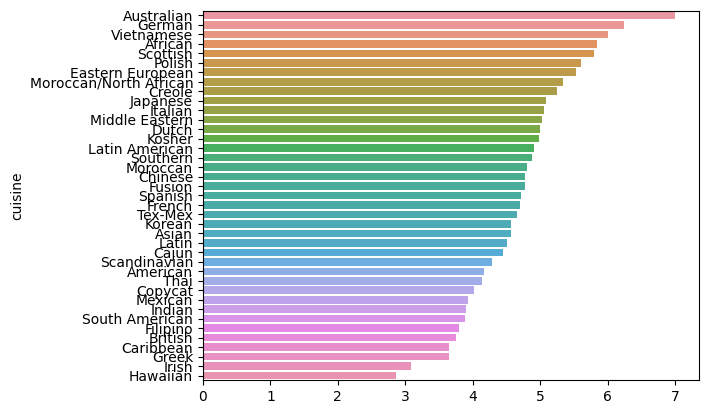

In [113]:
sns.barplot(y=mean_steps_by_cuisine.index, x=mean_steps_by_cuisine.values, orient='h')

In [132]:
mean_steps_by_cuisine = cuisine_steps_df.groupby(['cuisine']).agg(
    ['count', 'mean']
)
mean_steps_by_cuisine

num_steps          
                           count      mean
cuisine                                   
African                       39  5.846154
American                    2565  4.171540
Asian                        217  4.562212
Australian                     1  7.000000
British                      103  3.747573
Cajun                         18  4.444444
Caribbean                     82  3.646341
Chinese                      264  4.780303
Copycat                       54  4.018519
Creole                        12  5.250000
Dutch                          2  5.000000
Eastern European              28  5.535714
Filipino                       5  3.800000
French                       367  4.692098
Fusion                        13  4.769231
German                        30  6.233333
Greek                         45  3.644444
Hawaiian                      15  2.866667
Indian                       168  3.898810
Irish                         11  3.090909
Italian                      525  5.060952
Japanese                     144  5.090278
Korean                        87  4.563218
Kosher                        44  4.977273
Latin                         89  4.505618
Latin American                40  4.900000
Mexican                      305  3.934426
Middle Eastern               125  5.024000
Moroccan                      20  4.800000
Moroccan/North African         3  5.333333
Polish                         5  5.600000
Scandinavian                  14  4.285714
Scottish                       5  5.800000
South American                18  3.888889
Southern                      34  4.882353
Spanish                       84  4.714286
Tex-Mex                       38  4.657895
Thai                         165  4.139394
Vietnamese                    49  6.000000